# Understanding Descriptive Statistics

Import the necessary libraries here:

In [63]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [64]:
# throwing dice 10 times
throw = np.random.randint(1,7, size= 10)
count_of_results = {1:0, 2:0, 3:0, 4:0, 5:0, 6:0}

for result in throw:
    count_of_results[result] = count_of_results[result]+ 1

count_df = pd.DataFrame(pd.Series(count_of_results), columns=['count'])
count_df

,count
1,1
2,1
3,3
4,0
5,3
6,2


#### 2.- Plot the results sorted by value.

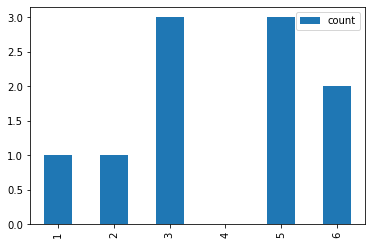

In [208]:
count_df.plot(kind='bar', y='count', by= 'value')
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [66]:
# frequency distribution
count_df['frequency'] = count_df['count']/ 10
count_df

,count,frequency
1,1,0.1
2,1,0.1
3,3,0.3
4,0,0.0
5,3,0.3
6,2,0.2


In [325]:
"""
the frequency is the number of time a value appears
"""

'\nthe frequency is the number of time a value appears\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [220]:
# mean
def find_mean(obs):
    mean = sum(obs) / len(obs)
    return mean

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [217]:
# mean of frequency distribution 
find_mean(count_df['frequency'])

0.16666666666666666

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [200]:
# median
def find_median(dataset):
    n = len(dataset)
    s = np.sort(dataset)
    index = int(n / 2)

    if n % 2 == 1:
        return s[index]
    else:
        return (s[index-1] + s[index]) /2

In [201]:
list1= [1,2,3,4,5]
find_median(list1)

3

In [202]:
print(np.sort(count_df['count']))
q2 = find_median(count_df['count'])
q2


[0 1 1 2 3 3]


1.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [317]:
# quartiles
def find_quartiles(dataset):
    n = len(dataset)
    s = np.sort(dataset)
    index = int(n / 2)
    q2 = find_median(dataset)
    
    if n % 2 == 1:
        lower_half = s[:int(index+1)]
        upper_half = s[int(index):]
    else:
        lower_half = s[:int(index)]
        upper_half = s[int(index):]
    
    n2 = len(lower_half)
    index2 = int(n2/2)
    if n2 % 2 == 1:
        q1 = lower_half[index2]
        q3 = upper_half[index2]
        q4 = max(s)
    else:
        q1 = (lower_half[index2-1] + lower_half[index2]) /2
        q3 = (upper_half[index2-1] + upper_half[index2]) /2
        q4 = max(s)

    return q1, q2, q3, q4

In [296]:
# test 1
lis2 = [1,2,3,4,5,6,7,8,9,10]
find_quartiles(lis2)

(array([1, 2, 3, 4, 5]), 5.5, array([ 6,  7,  8,  9, 10]))

In [206]:
# test 2
list1= [1,2,3,4,5]
find_quartiles(list1)

(2, 3, 4)

In [207]:
# test 3
print(np.sort(count_df['count']))
find_quartiles(count_df['count'])

[0 1 1 2 3 3]


(1, 1.5, 3)

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [265]:
hundred_dice_roll = pd.read_csv("../data/roll_the_dice_hundred.csv")
hundred_dice_roll_sorted = hundred_dice_roll.sort_values(by= 'value')

hundred_dice_roll_sorted

,Unnamed: 0,roll,value
0,0,0,1
47,47,47,1
56,56,56,1
9,9,9,1
73,73,73,1
...,...,...,...
17,17,17,6
11,11,11,6
24,24,24,6
21,21,21,6


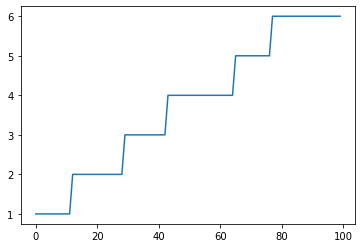

In [221]:
plt.plot(hundred_dice_roll_sorted['value'])
plt.show()

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [319]:
# mean of dice value
find_mean(hundred_dice_roll['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


In [267]:
# freq dist of hundred dice roll
counted_dice_roll = hundred_dice_roll.groupby('value').agg({'value':'count'})
counted_dice_roll['frequency'] = counted_dice_roll['value']/ 100
counted_dice_roll

,value,frequency
value,,
1,12,0.12
2,17,0.17
3,14,0.14
4,22,0.22
5,12,0.12
6,23,0.23


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

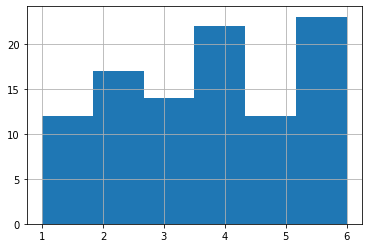

In [322]:
# your code here
hundred_dice_roll['value'].hist(bins=6)
plt.show()

In [323]:
"""
the value is leaning more towards the upper half, which we can see from the histogram that the higher number appears slightly
more time than the lower numbers 
"""

'\nthe value is leaning more towards the upper half, which we can see from the histogram that the higher number appears slightly\nmore time than the lower numbers \n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [237]:
# freq of thousand dice roll
thousand_dice_roll = pd.read_csv('../data/roll_the_dice_thousand.csv')
counted_dice_roll = thousand_dice_roll.groupby('value').agg({'value':'count'})
counted_dice_roll['frequency'] = counted_dice_roll['value'] /1000
counted_dice_roll

,value,frequency
value,,
1,175,0.175
2,167,0.167
3,175,0.175
4,168,0.168
5,149,0.149
6,166,0.166


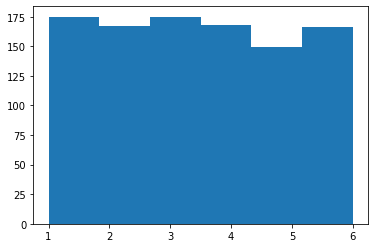

In [277]:
thousand_dice_roll['value'].hist(bins=6, grid= False)
plt.show()

In [324]:
"""
yes, as the number of throws significantly increased, the distribution of the number that appears is more well distributed than before
"""

'\nyes, as the number of throws significantly increased, the distribution of the number that appears is more well distributed than before\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [279]:
age_pop = pd.read_csv('../data/ages_population.csv')
age_pop_count = age_pop.groupby('observation').agg({'observation':'count'})
age_pop_count['frequency'] = age_pop_count['observation'] /1000
age_pop_count

,observation,frequency
observation,,
1.0,2,0.002
2.0,2,0.002
4.0,1,0.001
5.0,2,0.002
6.0,2,0.002
...,...,...
69.0,1,0.001
70.0,1,0.001
71.0,1,0.001


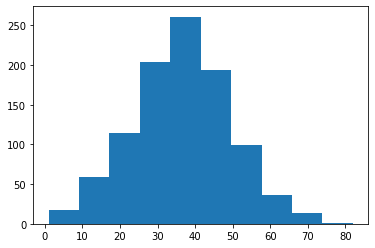

In [288]:
age_pop['observation'].hist(grid=False)
plt.show()

In [85]:
"""
based on the plot, the mean will be around 30 - 40.
and the standard deviation will be around 10 - 20.
"""

'\nyour comments here\n'

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [290]:
# your code here
print(age_pop.mean())
print(age_pop.std())

observation    36.56
dtype: float64
observation    12.8165
dtype: float64


#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [293]:
# your code here
age_pop2 = pd.read_csv('../data/ages_population2.csv')
age_pop_count = age_pop2.groupby('observation').agg({'observation':'count'})
age_pop_count['frequency'] = age_pop_count['observation'] /1000
age_pop_count

,observation,frequency
observation,,
19.0,3,0.003
20.0,13,0.013
21.0,17,0.017
22.0,35,0.035
23.0,41,0.041
24.0,78,0.078
25.0,98,0.098
26.0,120,0.120
27.0,125,0.125


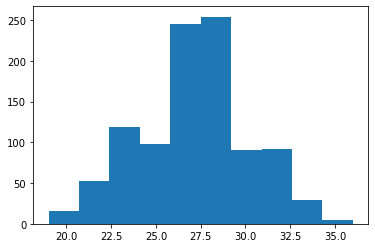

In [310]:
age_pop2['observation'].hist(grid=False)
plt.show()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [87]:
"""
yes, this population age range is smaller.
"""

'\nyour comments here\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [297]:
# your code here
print(age_pop2.mean())
print(age_pop2.std())

observation    27.155
dtype: float64
observation    2.969814
dtype: float64


In [327]:
"""
as the age range is smaller, the standard deviation is low.
and the population is younger.
"""

'\nas the age range is smaller, the standard deviation is low.\nand the population is younger.\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [308]:
# your code here
age_pop3 = pd.read_csv('../data/ages_population3.csv')
age_pop_count = age_pop3.groupby('observation').agg({'observation':'count'})
age_pop_count['frequency'] = age_pop_count['observation'] /1000
age_pop_count

,observation,frequency
observation,,
1.0,1,0.001
2.0,2,0.002
4.0,2,0.002
5.0,1,0.001
7.0,1,0.001
...,...,...
73.0,6,0.006
74.0,6,0.006
75.0,2,0.002


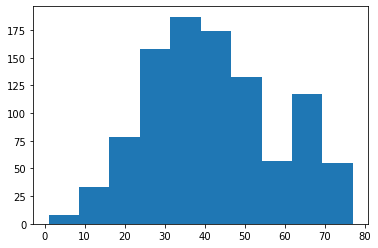

In [311]:
age_pop3['observation'].hist(grid=False)
plt.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [309]:
# your code here
print(age_pop3.mean())
print(age_pop3.std())

observation    41.989
dtype: float64
observation    16.144706
dtype: float64


In [326]:
"""
this population has larger age range, and the population is older.
"""

'\nthis population has larger age range, and the population is older.\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [316]:
# quantile
q1 = np.quantile(age_pop3, 0.25)
q2 = np.quantile(age_pop3, 0.50)
q3 = np.quantile(age_pop3, 0.75)

print(q1,q2,q3)

30.0 40.0 53.0


In [318]:
# your code here
find_quartiles(age_pop3['observation'])

(30.0, 40.0, 53.0, 77.0)

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [95]:
# no other percentile is useful, in my opinion

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [97]:
# your code here

In [98]:
"""
your comments here
"""

'\nyour comments here\n'